In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [4]:
target1 = 0
target2 = 0
target3 = 0
for i in iris.target:
    if i == 0:
        target1 += 1
    elif i == 1:
        target2 += 1
    elif i == 2:
        target3 += 1
    else:
        pass
        
print(f"Setosa: {target1}, Versicolor: {target2}, Virginica: {target3}")

Setosa: 50, Versicolor: 50, Virginica: 50


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
x = iris.data
y = iris.target
flowers = KNeighborsClassifier(n_neighbors=1)
flowers.fit(x,y)
prediction = flowers.predict(x)
accuracy = accuracy_score(y, prediction)
print(accuracy)

1.0


Accuracy is 100%, which means that this model overfit the dataset, since all data are used to train the model.

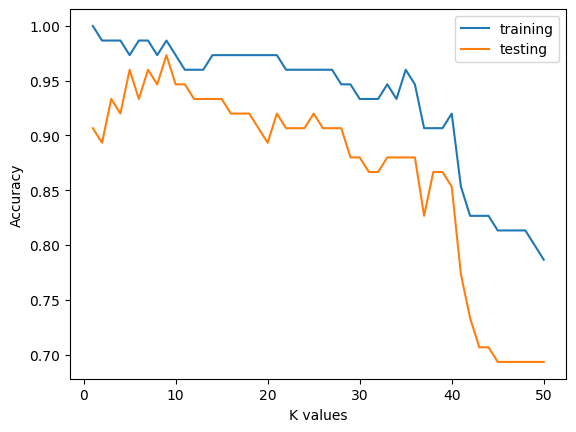

Best k value: 9


In [7]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=0, shuffle = True)
training_acc = []
testing_acc = []
for k in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    train_prediction = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_prediction)
    test_prediction = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_prediction)
    training_acc.append(train_acc)
    testing_acc.append(test_acc)

k_values = [i for i in range(1,51)]


plt.figure()
plt.plot(k_values, training_acc, label = 'training')
plt.plot(k_values,testing_acc, label = 'testing')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

best_acc = max(testing_acc)
best_k = testing_acc.index(best_acc)+1
print(f"Best k value: {best_k}")


The best k value should be 9, which has the highest testing accuracy.

In [8]:
x_hat = [[3.8,5.0,1.2,4.1]]
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)
y_hat = model.predict(x_hat)
print(f"The predicted class is {iris.target_names[y_hat]}")

The predicted class is ['setosa']
